## Human Activity Recognition

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [ ]:
## reading training data
train_df = pd.read_csv()
##reading test data
test_df = pd.read_csv()

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
print("train data shape: ", train_df.shape)
print("test data shape: ", test_df.shape)

In [ ]:
## train and test data 
X_train = train_df.iloc[:, :-2]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, :-2]
y_test = test_df.iloc[:, -1]

In [ ]:
## unique classes
y_train.unique()

In [ ]:
## value counts of unique classes
class_label = y_train.value_counts()

In [ ]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75)
sns.barplot(class_label.index, class_label);

In [ ]:
## Standard Scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
##  LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

y_test = label_encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [ ]:
## converting into numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_train

In [73]:
## PCA 
pca = PCA(n_components=None)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [74]:
X_train

array([[-1.61385437e+01,  2.15202401e+00,  3.14478025e+00, ...,
        -4.27136722e-15,  5.72222463e-17, -2.34441529e-17],
       [-1.52961943e+01,  1.38714378e+00, -6.82221071e-01, ...,
        -6.08755449e-16,  2.60584005e-16, -6.95377510e-17],
       [-1.51370186e+01,  2.47335094e+00, -1.75664057e+00, ...,
        -9.91046502e-17, -4.09340809e-16,  1.32293630e-16],
       ...,
       [ 1.43334359e+01, -1.22607119e+01,  4.02594620e+00, ...,
         1.53359076e-15,  2.25751862e-16, -4.88702784e-17],
       [ 1.28760189e+01, -1.40712559e+01,  2.91606098e+00, ...,
        -1.06355487e-15,  2.16198057e-17,  2.70580757e-17],
       [ 1.30161037e+01, -1.22442612e+01,  1.33604965e+00, ...,
         1.02200086e-15,  1.70426180e-16, -1.94885453e-17]])

In [75]:
## Model 

model = keras.models.Sequential()
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dense(units=6,activation='softmax'))

In [76]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
46/46 [==============================] - 6s 24ms/step - loss: 1.1816 - accuracy: 0.5844 - val_loss: 0.2190 - val_accuracy: 0.9252
Epoch 2/15
46/46 [==============================] - 0s 7ms/step - loss: 0.1102 - accuracy: 0.9690 - val_loss: 0.1347 - val_accuracy: 0.9443
Epoch 3/15
46/46 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.1308 - val_accuracy: 0.9470
Epoch 4/15
46/46 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.1299 - val_accuracy: 0.9524
Epoch 5/15
46/46 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.99 - 0s 6ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.1541 - val_accuracy: 0.9524
Epoch 6/15
46/46 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.1600 - val_accuracy: 0.9524
Epoch 7/15
46/46 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.1545 

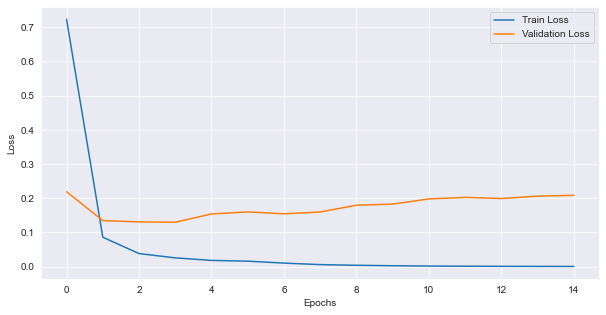

In [82]:
## Loss Vs. Epochs

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss']);

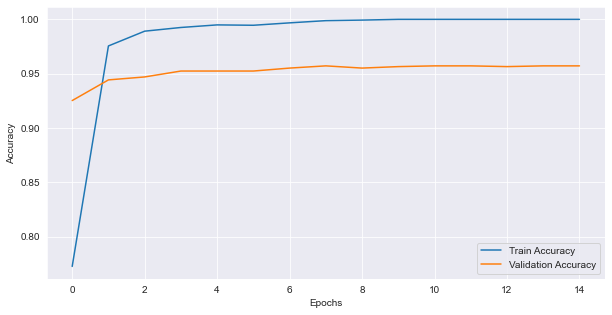

In [83]:
## Accuracy Vs. Epochs

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy']);

In [84]:
## prediction

pred = model.predict(X_test)

In [88]:
predic = []

for p in pred:
    p = np.argmax(p)
    predic.append(p)

In [90]:
predic = np.array(predic)

In [94]:
y_test.shape

(2947, 6)

In [108]:
y_test[0]

y_test_label = []
for i in range(len(y_test)):
    for ind, j in enumerate(y_test[i]):
        if j == 1:
            y_test_label.append(ind)

In [109]:
y_test_label = np.array(y_test_label)

In [110]:
y_test_label

array([2, 2, 2, ..., 5, 5, 5])

In [111]:
predic

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       537
           1       0.97      0.86      0.91       491
           2       0.84      0.98      0.90       532
           3       0.92      0.99      0.95       496
           4       0.97      0.90      0.94       420
           5       0.93      0.92      0.92       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9328130302002036
----------------------------------------------------------------------------------------------------



<AxesSubplot:>

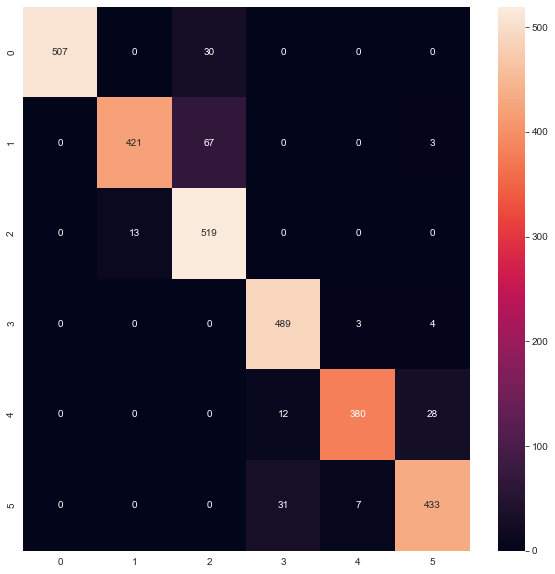

In [113]:
print("Classification Report: \n", classification_report(y_test_label, predic))
print("-" * 100)
print()
print("Accuracy Score: ", accuracy_score(y_test_label, predic))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test_label, predic), annot=True, fmt='g')